In [1]:
# Pre-Importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file_path = "./advertising.csv"
# Loading the df
dataset = pd.read_csv(file_path)

In [3]:
# Let's work with the copy and keep the original as it is
df = dataset.copy(deep=True)
df.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
# Let's see which variables are correlated, we'll draw a correlation matrix, to do that we need to separate out the numerical data
num_cat = [cat for cat in df if df[cat].dtype in ['float64', 'int64']]
# Though we will remove Male because it's one hot encoded categorical variable
num_cat = [cat for cat in num_cat if cat != 'Male']
num_cat

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Clicked on Ad']

In [5]:
# Making the dataset to have only numerical categories
df_num_cat = df[num_cat]
df_num_cat.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,0
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,0
9,69.88,20,55642.32,183.82,0


In [6]:
# Now we are going to separate the X and y, the dependent and independent, the target and prediction
y = df_num_cat["Clicked on Ad"]
X = df_num_cat[[cat for cat in num_cat if cat != "Clicked on Ad"]]
X.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58
5,59.99,23,59761.56,226.74
6,88.91,33,53852.85,208.36
7,66.00,48,24593.33,131.76
8,74.53,30,68862.00,221.51
9,69.88,20,55642.32,183.82


In [7]:
# Now we are going to normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   ],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ]])

In [8]:
# Now let's split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=16)

In [9]:
# Now we're going to train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Now that it is trained we're going to see the predictions made from the model given the testing data
y_pred = lr.predict(X_test)

In [10]:
# Now let's see how our model has done!
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.948


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       125
           1       0.97      0.92      0.95       125

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



# New Approach
In our previous model attempt we made a Logistic Regresssion model but I had to leave out a lot of valuable information like, Ad Topic Line, City, Male(1 or 0), Country, Timestamp.
So let's make that this time

## Analyzing Temporal Behaviour
I want to analyse the temporal behaviour of the dataset given, meaning I want to see if there are any patterns occuring based on the time of the collection of data

In [12]:
# Extracting the Date and Time objects from the Data
df_2 = dataset.copy(deep=True)
df_2.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


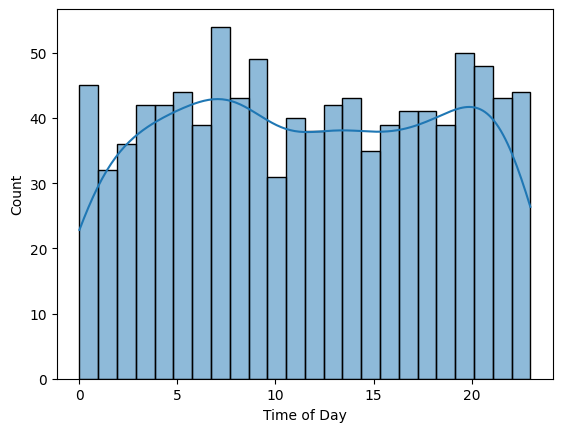

In [13]:
import matplotlib.pyplot as plt

df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])
df_hours = df_2["Timestamp"].dt.hour
plt.xlabel("Time of Day")
plt.ylabel("Count")
sns.histplot(x=df_hours, edgecolor="black", bins=24, kde=True)
plt.show()

Let's plot only the clicked ads vs the time of day now

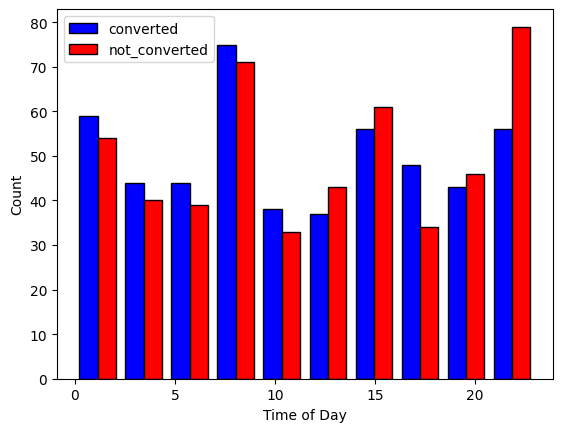

In [14]:
# Let's plot all 3 together 
clicked_mask = df["Clicked on Ad"] == 1
notclicked_mask = df["Clicked on Ad"] == 0
df_true_hours = df_2['Timestamp'][clicked_mask].dt.hour
df_false_hours = df_2["Timestamp"][notclicked_mask].dt.hour
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.hist((df_true_hours, df_false_hours), label=('converted', 'not_converted'), edgecolor='black', color=('blue', 'red'))
plt.legend()
plt.show()

Time variables cannot be treated as regular variables because the time 00:00 and 23:00 are only 1 hour apart but the way this model treats this number is that 23 >> 0 which is incorrect behaviour and this will bias the model because it will give more weightage to higher timed data points. So let's normalize this value by feeding it to a cyclic function, like sine and cosine this will output values [-1,1]. We'll then scale 0 to 23 using min max scaler. Then we'll use that in sin(2pi * t) this when normalized will take care of the above abnormality 

In [15]:
# Just altering my data columns to include the hour, day_of_week and month variables
df_2['hour'] = df_2['Timestamp'].dt.hour
df_2['day_of_week'] = df_2['Timestamp'].dt.dayofweek
df_2['month'] = df_2['Timestamp'].dt.month

In [16]:
# Let's see what we have created
df_2.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour,day_of_week,month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4,6
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,14,3,5
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,20,3,1
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,1,0,3
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,9,0,4
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,1,0,7


In [17]:
# Converting the time and day of the week into these normalized cylic values
df_2['hour_sin'] = np.sin(2 * np.pi * df_2['hour'] / 24)
df_2['hour_cos'] = np.cos(2 * np.pi * df_2['hour'] / 24)

df_2['dow_sin'] = np.sin(2 * np.pi * df_2['day_of_week'] / 7)
df_2['dow_cos'] = np.cos(2 * np.pi * df_2['day_of_week'] / 7)

In [18]:
# Now let's combine all the feature columns
feature_cols = num_cat + ["hour_sin", "hour_cos", "dow_sin", "dow_cos"]
feature_cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Clicked on Ad',
 'hour_sin',
 'hour_cos',
 'dow_sin',
 'dow_cos']

In [19]:
# Assigning X2 and y2 here
X2 = df_2[feature_cols]
y2 = df_2["Clicked on Ad"]

# Now doing the regular, scaling, splitting, training, prediction

X2_scaled = sc.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=32)

lr2 = LogisticRegression(max_iter=1050)
lr2.fit(X2_train, y2_train)

y2_pred = lr2.predict(X2_test)

In [20]:
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy2

1.0

In [21]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       131

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## Conclusion
This seems like the model has overfit on this data, so we can either get more data to verify or use the earlier model which was developed